In [2]:
import sys
sys.path.append("./flask")

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from keras import backend as K
import inception_v4
import numpy as np
import cv2
import os, PIL
from PIL import Image
import tensorflow as tf
from tensorflow.python.platform import gfile
from model import get_keras_objects
import matplotlib.pyplot as plt
from plotly import offline as py, graph_objs as go
import cytoolz as cz


def reduce_tsne(x, **kwargs):
    return TSNE(**kwargs).fit_transform(x)

py.init_notebook_mode()

%matplotlib inline

size = 299
folder = "data/images2440"

In [2]:
sess, graph, image, embedding, keras_training = get_keras_objects()

In [3]:

features_test = []
path_images = []
for name in os.listdir(folder):
    path = os.path.join(folder,name)
    im = Image.open(path)
    if not (im.mode == "RGB"):
        im = im.convert("RGB")
    if ( im.size[0] != size or im.size[1] != size): #reshape it
        im = im.resize((size, size,), PIL.Image.ANTIALIAS)
    features_test.append(np.array(im))
    path_images.append(path)
            
        
features_test =  np.stack(features_test)
features_test.shape

(619, 299, 299, 3)

In [4]:
predictions = []
for img in features_test:
    pred = sess.run(embedding,{image: [img], keras_training:False })
    predictions.append(np.squeeze(pred))
    
predictions =  np.stack(predictions)
predictions.shape

(619, 1536)

In [9]:
predictions_reduced = reduce_tsne(predictions, n_components=3, perplexity=15.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=3000, init="pca")
predictions_reduced.shape

(619, 3)

In [10]:
n_clusters = 7
kmeans = KMeans(n_clusters = n_clusters, random_state=0).fit(predictions_reduced)
kmeans.labels_.shape

(619,)

In [15]:
trace1 = go.Scatter3d(
    x=predictions_reduced[:,0],
    y=predictions_reduced[:,1],
    z=predictions_reduced[:,2],
    mode='markers',
    marker=dict(
    size='16',
    color = kmeans.labels_, #set color equal to a variable
    colorscale='Viridis',
    showscale=True
)
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

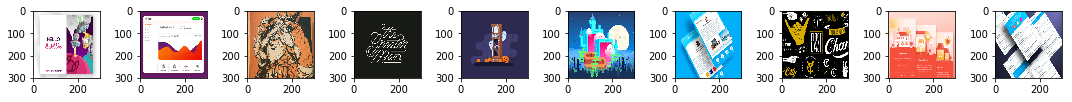

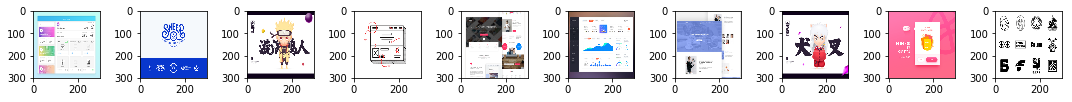

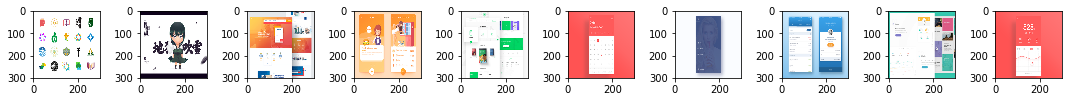

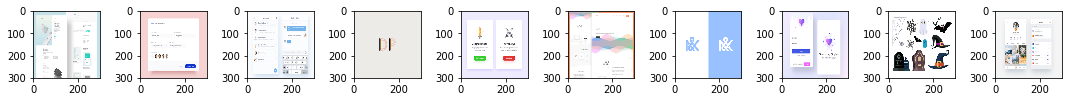

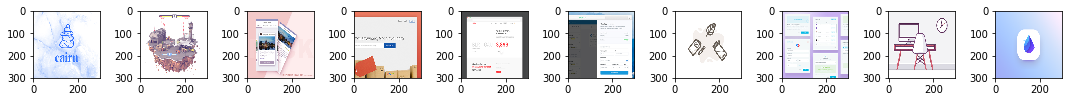

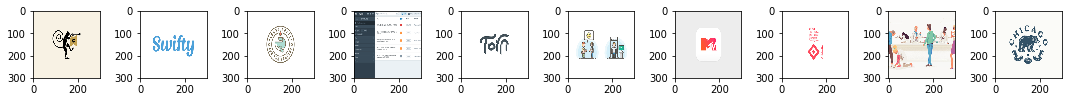

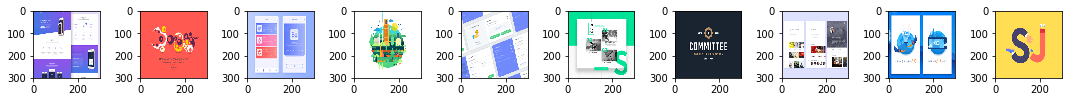

In [14]:
clusters = kmeans.labels_
n_images = 10

for i in range(n_clusters):
    
    f, axs = plt.subplots(1, n_images, figsize=(15,15))
    
    for j, index in enumerate(cz.take(n_images, np.squeeze(np.argwhere(clusters==i)))):
        path = path_images[index]
        # print(index)
        im = Image.open(path)
        axs[j].imshow(features_test[index,:,:,:])
    
    f.tight_layout()
    plt.show()


In [17]:
import scipy

In [ ]:
from random import randint

clusters = kmeans.labels_
n_images = 4

for i in range(n_clusters):
    
    f, axs = plt.subplots(1, n_images, figsize=(15,15))
    
    indexes = np.squeeze(np.argwhere(clusters==i))
    sample = randint(0, len(indexes)-1)
    sample_image_reduced = predictions_reduced[indexes[sample]]

    distances = np.array((map(lambda x: scipy.spatial.distance.euclidean(x,sample_image_reduced), predictions_reduced[indexes])))

    sort_index = np.argsort(distances)

    path_images_cluster = [path_images[i] for i in indexes]
    
    #print distances[sort_index[0]]
    #print path_images[indexes[sample]]
    #print path_images_cluster[sort_index[0]]
    
    for j in range(n_images):
        path = path_images_cluster[sort_index[j]]
        im = Image.open(path)
        axs[j].imshow(np.asarray(im))
    
    f.tight_layout()
    plt.show()

        


TypeError: Image data can not convert to float

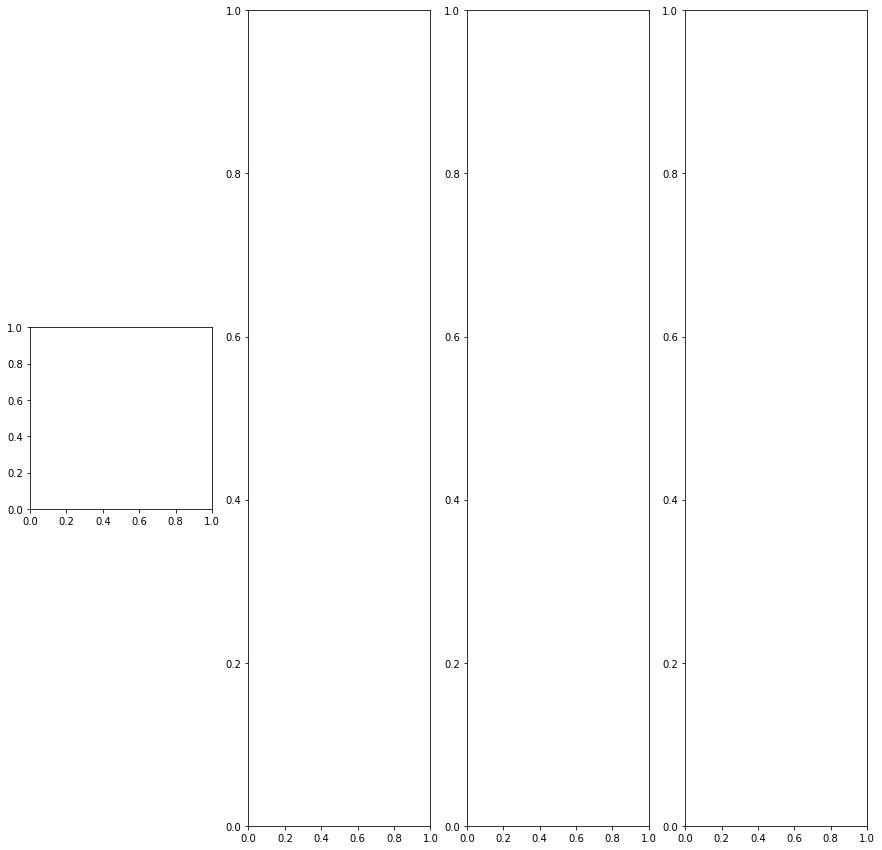

In [21]:
from random import randint

clusters = 20
n_images = 4

for i in range(clusters):
    
    f, axs = plt.subplots(1, n_images, figsize=(15,15))
    
    sample = randint(0, len(predictions_reduced)-1)
    sample_image_reduced = predictions_reduced[sample]

    distances = np.array((map(lambda x: scipy.spatial.distance.euclidean(x,sample_image_reduced), predictions_reduced)))

    sort_index = np.argsort(distances)
    
    #print distances[sort_index[0]]
    #print path_images[indexes[sample]]
    #print path_images_cluster[sort_index[0]]
    
    for j in range(n_images):
        path = path_images[sort_index[j]]
        im = Image.open(path)
        axs[j].imshow(np.asarray(im))
        
    
    f.tight_layout()
    plt.show()
        


In [1]:
from random import randint
import json

input_json = '''[{"filename":"dribbble_a61065bb795229788c5447c5e586f3ca.png"},{"filename":"dribbble_14799232b35752dad295edf33326784c.png"}]'''

clusters = 20
n_images = 4

for i in range(clusters):
    
    f, axs = plt.subplots(1, n_images, figsize=(15,15))
    
    for j in range(n_images):
        path = path_images[sort_index[j]]
        im = Image.open(path)
        axs[j].imshow(np.asarray(im))
        
    
    f.tight_layout()
    plt.show()

NameError: name 'distances' is not defined

In [7]:
input_json = '''{
    "data": [
        {
            "id": [
                "59b61548a0931d451bb39333"
            ],
            "clusters": 2,
            "filename": "dribbble_e45b7fba6f41a36c242b2abf1f7a183a.png",
            "tsne_embeddings": [
                -15.427343870829802,
                7.499702850210498,
                2.9459047166566017
            ]
        },
        {
            "id": [
                "59b61548a0931d451bb392c0"
            ],
            "clusters": 1,
            "filename": "behance_355eeb47be6315eccde4c79f2b1dc610.png",
            "tsne_embedding": [
                71.24349904144633,
                8.89581858814975,
                19.031347454843292
            ]
        },
        {
            "id": [
                "59b61548a0931d451bb39478"
            ],
            "clusters": 6,
            "filename": "dribbble_4cb903873b38e28cea84d0330e500b53.jpg",
            "tsne_embedding": [
                43.128127900685605,
                -0.7794385760025183,
                -0.4477824828781458
            ]
        },
        {
            "id": [
                "59b61548a0931d451bb394a6"
            ],
            "clusters": 3,
            "filename": "dribbble_36adac9dc0a10022f2b29d294de72b35.jpg",
            "tsne_embedding": [
                17.327851920903242,
                -15.823757050330691,
                -3.979274549170741
            ]
        },
        {
            "id": [
                "59b61548a0931d451bb39475"
            ],
            "clusters": 5,
            "filename": "dribbble_4b6e45049a17cb54a8dac927c6e451ca.png",
            "tsne_embedding": [
                98.19686566693011,
                40.55444807629549,
                -16.25970550705142
            ]
        },
        {
            "id": [
                "59b61548a0931d451bb39516"
            ],
            "clusters": 4,
            "filename": "dribbble_23ff34b1289f9bba59859bd29cb80163.png",
            "tsne_embedding": [
                261.8703428467655,
                -58.23743113336283,
                43.44475460004853
            ]
        },
        {
            "id": [
                "59b61548a0931d451bb39309"
            ],
            "clusters": 2,
            "filename": "dribbble_f355b457fc49bd29164355ea9c1ff8fd.jpg",
            "tsne_embedding": [
                -17.74640590021518,
                6.744775862326654,
                3.5438870130685505
            ]
        },
        {
            "id": [
                "59b61548a0931d451bb39520"
            ],
            "clusters": 0,
            "filename": "dribbble_1b24d3deca1540590082b40d1f3413fe.jpg",
            "tsne_embedding": [
                -6.026688697524618,
                -4.382591286946498,
                -2.322246985177657
            ]
        }
    ]
}'''

[u'59b61548a0931d451bb39333']
dribbble_e45b7fba6f41a36c242b2abf1f7a183a.png


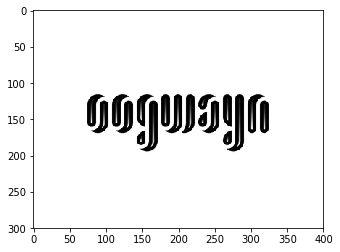

[u'59b61548a0931d451bb392c0']
behance_355eeb47be6315eccde4c79f2b1dc610.png


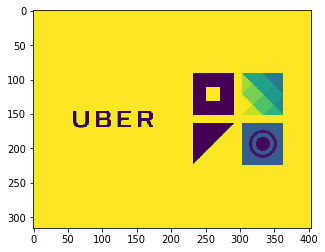

[u'59b61548a0931d451bb39478']
dribbble_4cb903873b38e28cea84d0330e500b53.jpg


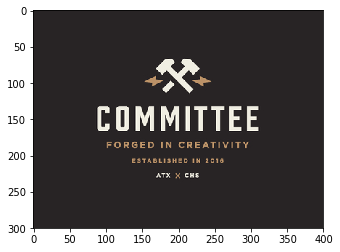

[u'59b61548a0931d451bb394a6']
dribbble_36adac9dc0a10022f2b29d294de72b35.jpg


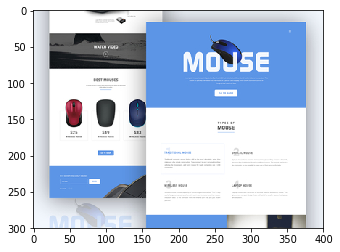

[u'59b61548a0931d451bb39475']
dribbble_4b6e45049a17cb54a8dac927c6e451ca.png


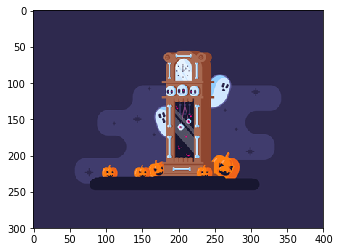

[u'59b61548a0931d451bb39516']
dribbble_23ff34b1289f9bba59859bd29cb80163.png


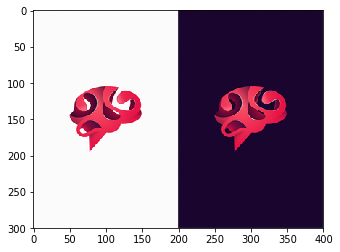

[u'59b61548a0931d451bb39309']
dribbble_f355b457fc49bd29164355ea9c1ff8fd.jpg


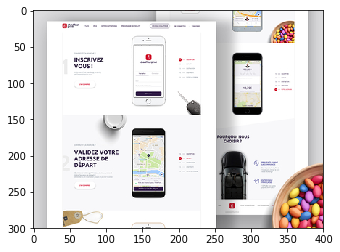

[u'59b61548a0931d451bb39520']
dribbble_1b24d3deca1540590082b40d1f3413fe.jpg


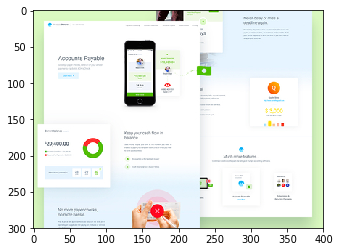

In [8]:
import json

dicto = json.loads(input_json)["data"]
for data in dicto:
    path = os.path.join(folder,data['filename'])
    print(data["id"])
    print(data["filename"])
    im = Image.open(path)
    plt.imshow(np.asarray(im))
    plt.show()

In [9]:
recommendation_json = '''{
    "data": [
        {
            "_id": [
                "59b61548a0931d451bb3942e"
            ],
            "distance": 2.5770850939812107,
            "filename": "dribbble_6f4da07fc9753a1ae8c54f2866586097.jpg"
        },
        {
            "_id": [
                "59b61548a0931d451bb393c1"
            ],
            "distance": 3.157219140857291,
            "filename": "dribbble_9d4dc46bbf3d390f5d6e43eb40f14b1e.png"
        },
        {
            "_id": [
                "59b61548a0931d451bb392e5"
            ],
            "distance": 4.273675483870537,
            "filename": "dribbble_0c2eb661b070e545012ecbf34dbd4969.png"
        },
        {
            "_id": [
                "59b61548a0931d451bb393c6"
            ],
            "distance": 5.267536342220191,
            "filename": "dribbble_dac2ffb12e3425651c83e73bacb0dbc7.jpg"
        },
        {
            "_id": [
                "59b61548a0931d451bb393bf"
            ],
            "distance": 9.970667650115631,
            "filename": "dribbble_9cfa3b3601110f355a87740352808c37.png"
        }
    ]
}'''

2.57708509398
[u'59b61548a0931d451bb3942e']


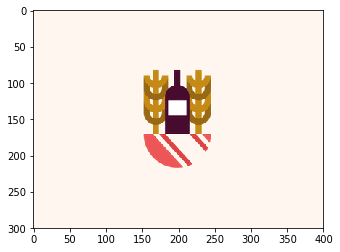

3.15721914086
[u'59b61548a0931d451bb393c1']


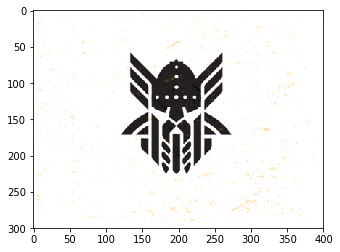

4.27367548387
[u'59b61548a0931d451bb392e5']


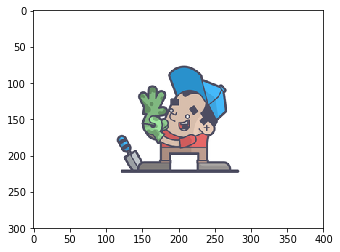

5.26753634222
[u'59b61548a0931d451bb393c6']


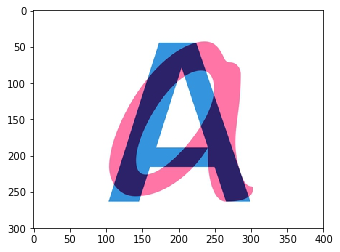

9.97066765012
[u'59b61548a0931d451bb393bf']


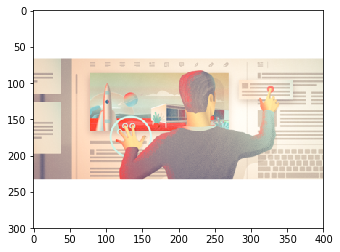

In [10]:
import json
dicto = json.loads(recommendation_json)["data"]
for data in dicto:
    path = os.path.join(folder,data['filename'])
    print(data["distance"])
    print(data["_id"])
    im = Image.open(path)
    plt.imshow(np.asarray(im))
    plt.show()